#01 Árboles de clasificación con scklearn

Tipo de algoritmo de aprendizaje supervisado que se basa en realizar particiones a partir de distintos niveles de las variables disponibles.




## 0101 Import
Importamos todas las librerías necesarias para este análisis: pandas, numpy, seaborn, matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Nos importamos las funciones de árboles de scikit learn
from sklearn import tree

## 0102 Carga el dataset de accidentes cardiacos
Para probar a hacer árboles de decisión utilizaremos un dataset sobre accidentes coronarios que he encontrado en Kaggle ([aquí](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data)).


Podéis encontrar el archivo listo para importar en github: https://github.com/abelmmg/TheValley_AI/blob/main/heart_failure_clinical_records_dataset.csv.

Importa este dataset en un dataframe llamado **df**.

Descripción de columnas:
* anaemia: Decrease of red blood cells or hemoglobin (boolean)
* creatinine_phosphokinase: Level of the CPK enzyme in the blood (mcg/L)
* diabetes: If the patient has diabetes (boolean)
* ejection_fraction: Percentage of blood leaving the heart at each contraction (percentage)
* high_blood_pressure: If the patient has hypertension (boolean)
* platelets: Platelets in the blood (kiloplatelets/mL)
* serum_creatinine: Level of serum creatinine in the blood (mg/dL)
* serum_sodium: Level of serum sodium in the blood (mEq/L)
* sex: Woman or man (binary)



In [2]:
# URL al dataset
url = "https://raw.githubusercontent.com/abelmmg/TheValley_AI/main/heart_failure_clinical_records_dataset.csv"

# Importar csv
df = pd.read_csv(url)
# Visualización
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df_resumen = df[['age', 'anaemia', 'serum_creatinine', 'DEATH_EVENT']]
df_resumen

,age,anaemia,serum_creatinine,DEATH_EVENT
0,75.0,0,1.9,1
1,55.0,0,1.1,1
2,65.0,0,1.3,1
3,50.0,1,1.9,1
4,65.0,1,2.7,1
...,...,...,...,...
294,62.0,0,1.1,0
295,55.0,0,1.2,0
296,45.0,0,0.8,0
297,45.0,0,1.4,0


In [4]:
df_resumen.columns = ["Edad", "Anemia", "Serum", "Fallece"]
df_resumen

,Edad,Anemia,Serum,Fallece
0,75.0,0,1.9,1
1,55.0,0,1.1,1
2,65.0,0,1.3,1
3,50.0,1,1.9,1
4,65.0,1,2.7,1
...,...,...,...,...
294,62.0,0,1.1,0
295,55.0,0,1.2,0
296,45.0,0,0.8,0
297,45.0,0,1.4,0


# 02 Inicializamos el árbol
Definiendo las características que tendrá.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [5]:
# Inicializamos un árbol. Por ahora está vacío.
# Solo definimos cómo queremos que sea en cuanto a su estructura y condiciones de entrenamiento
arbol = tree.DecisionTreeClassifier(max_depth=3)
arbol

DecisionTreeClassifier(max_depth=3)

#03 Entrenamos el modelo
Una vez inicializado y definido el árbol, el método .[fit()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit) realiza el proceso de particionado recursivo que hemos hecho nosotros antes a mano.

In [6]:
df_resumen[["Edad", "Serum", "Anemia"]].shape

(299, 3)

In [7]:
df_resumen[["Fallece"]].shape

(299, 1)

In [8]:
# Entrenamos el árbol inicializado a partir de los datos que le pasemos con .fit()
arbol = arbol.fit(
    X=df_resumen[["Edad", "Serum", "Anemia"]],  # vars descriptivas
    y=df_resumen[["Fallece"]],                  # var objetivo
)
arbol

DecisionTreeClassifier(max_depth=3)

#04 Visualizamos el modelo
Una vez entrenado el modelo, podemos visualizarlo.

In [9]:
# Con el método export_text en un print()
esquema_print = tree.export_text(arbol, feature_names=["Edad", "Serum", "Anemia"])
print(esquema_print)

|--- Serum <= 1.81
|   |--- Edad <= 79.50
|   |   |--- Serum <= 0.95
|   |   |   |--- class: 0
|   |   |--- Serum >  0.95
|   |   |   |--- class: 0
|   |--- Edad >  79.50
|   |   |--- Serum <= 0.95
|   |   |   |--- class: 0
|   |   |--- Serum >  0.95
|   |   |   |--- class: 1
|--- Serum >  1.81
|   |--- Serum <= 2.05
|   |   |--- class: 1
|   |--- Serum >  2.05
|   |   |--- Serum <= 6.45
|   |   |   |--- class: 1
|   |   |--- Serum >  6.45
|   |   |   |--- class: 1



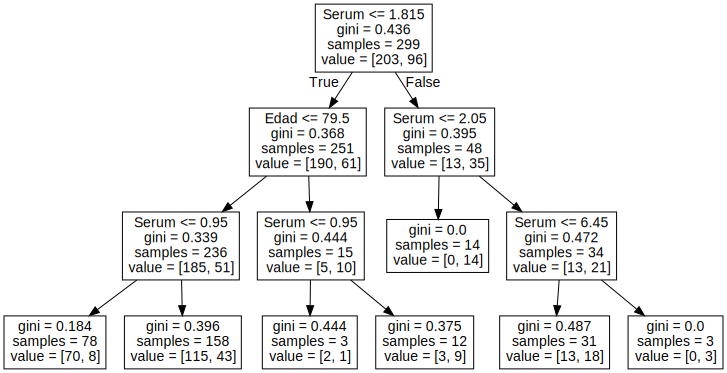

In [10]:
# O con la librería graphviz
import graphviz

# Export_graphviz
dot_data = tree.export_graphviz(
    arbol, out_file=None, feature_names=["Edad", "Serum", "Anemia"]
)
graph = graphviz.Source(dot_data)
graph

## EJERCICIO

  Mostrar el valor de la clase en el arbol mostrado con graphviz

Nota:
buscar solución en: https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

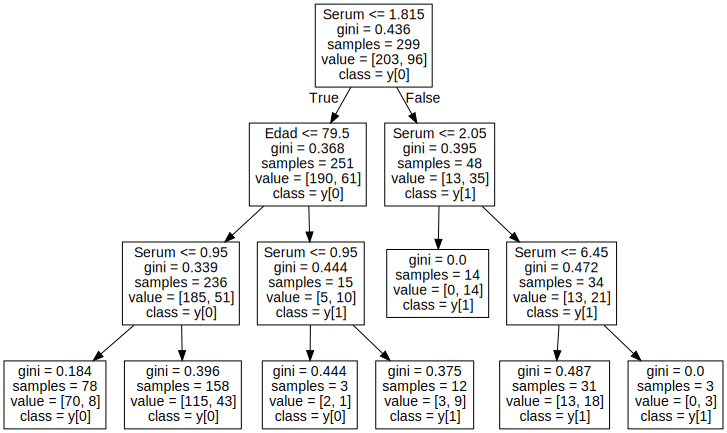

In [12]:
import graphviz

# Export_graphviz
dot_data = tree.export_graphviz(
    arbol, out_file=None, feature_names=["Edad", "Serum", "Anemia"], class_names=True
)
graph = graphviz.Source(dot_data)
graph

#05 Realizamos una predicción
Una vez el modelo está entrenado (definido) podemos pasarle datos para obtener las prediciones correspondientes de la variable objetivo.

Para esto utilizamos el método .[predict()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict).

In [13]:
# Predicción
prediccion = arbol.predict(df_resumen[["Edad", "Serum", "Anemia"]])
prediccion

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
# Comparo el resultado de la prediccion con df_resumen
df_resumen[["Edad", "Serum", "Anemia", "Fallece"]]

,Edad,Serum,Anemia,Fallece
0,75.0,1.9,0,1
1,55.0,1.1,0,1
2,65.0,1.3,0,1
3,50.0,1.9,1,1
4,65.0,2.7,1,1
...,...,...,...,...
294,62.0,1.1,0,0
295,55.0,1.2,0,0
296,45.0,0.8,0,0
297,45.0,1.4,0,0


In [16]:
# Cómo de buena es la predicción?
from sklearn.metrics import accuracy_score

accuracy_score(df_resumen["Fallece"], prediccion)

# ¿Que significa este resultado?

0.7725752508361204

## EJERCICIO con todas las características
Entrenamos de nuevo el árbol de decisión:
* con todas las variables del set de datos de accidente cardiaco,
* quitamos si alguna vemos que no aplica?
* Utilizamos un max_depth=6
* y evaluamos si la predicción es mejor o peor que utilizando tres variables.

In [17]:
df.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1


In [18]:
# Inicializamos un árbol. Por ahora está vacío. Solo definimos cómo queremos que sea.
arbol_grande = tree.DecisionTreeClassifier(max_depth=6)

In [19]:
# Matrices de datos
# Quitatmos time:
#   - No utilizamos la variable Time porque da información del target
#   - no la conoceríamos a la hora de hacer una predicción del futuro

cols = [
    "age",
    "anaemia",
    "creatinine_phosphokinase",
    "diabetes",
    "ejection_fraction",
    "high_blood_pressure",
    "platelets",
    "serum_creatinine",
    "serum_sodium",
    "sex",
    "smoking",
]
X = df[cols]
y = df["DEATH_EVENT"]

In [20]:
# Entrenamos el árbol inicializado a partir de los datos que le pasemos con .fit()
arbol_grande = arbol_grande.fit(X=X, y=y)
arbol_grande

DecisionTreeClassifier(max_depth=6)

In [21]:
# Podemos visualizar la estructura
print(tree.export_text(arbol_grande, feature_names=list(df.iloc[:, :-2].columns)))

|--- serum_creatinine <= 1.81
|   |--- ejection_fraction <= 27.50
|   |   |--- serum_sodium <= 143.00
|   |   |   |--- creatinine_phosphokinase <= 685.50
|   |   |   |   |--- platelets <= 275000.00
|   |   |   |   |   |--- age <= 58.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- age >  58.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- platelets >  275000.00
|   |   |   |   |   |--- serum_sodium <= 138.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- serum_sodium >  138.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- creatinine_phosphokinase >  685.50
|   |   |   |   |--- class: 1
|   |   |--- serum_sodium >  143.00
|   |   |   |--- class: 0
|   |--- ejection_fraction >  27.50
|   |   |--- age <= 79.50
|   |   |   |--- serum_creatinine <= 1.45
|   |   |   |   |--- creatinine_phosphokinase <= 6535.00
|   |   |   |   |   |--- platelets <= 332000.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- platelets >  33200

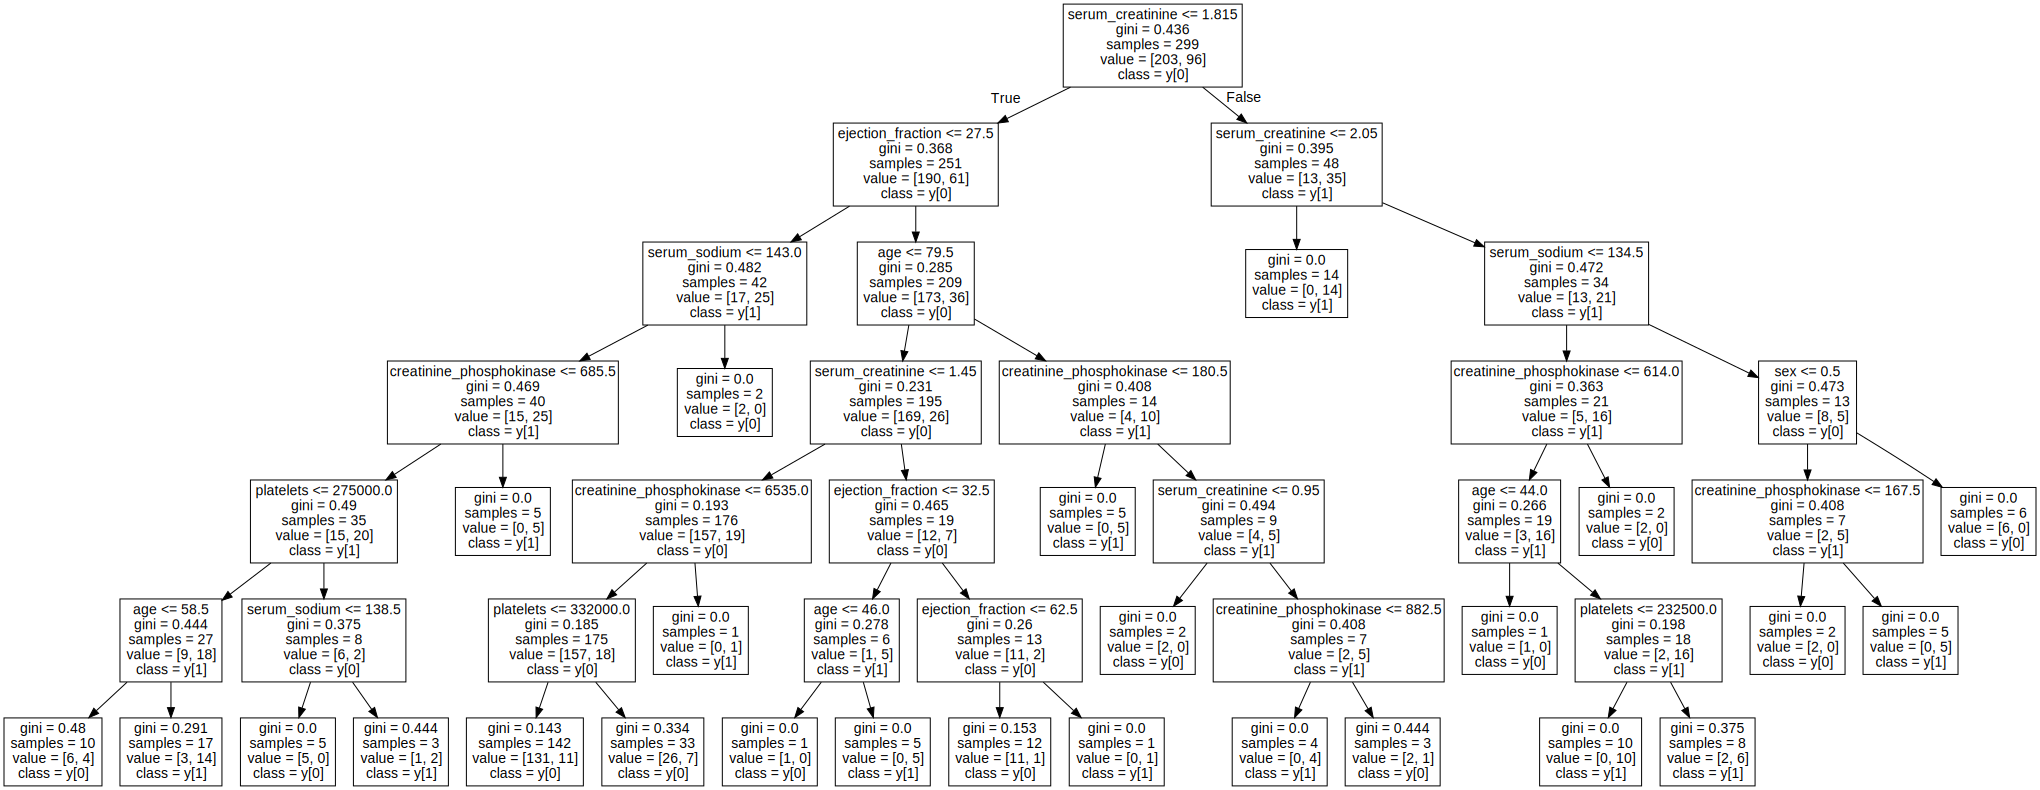

In [22]:
import graphviz

dot_data = tree.export_graphviz(
    arbol_grande, out_file=None, feature_names=list(X.columns), class_names=True
)
graph = graphviz.Source(dot_data)
graph

In [23]:
# Predicción
prediccion = arbol_grande.predict(X)
prediccion

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [24]:
# Precisión de la predicción
accuracy_score(y, prediccion)

0.8996655518394648

# EJERCICIO Partiendo training y test data

Repetir la predicción pero partiendo el dataset en training y test data.

```
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
```

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Nos importamos las funciones de árboles de scikit learn
from sklearn import tree

# URL al dataset
url = "https://raw.githubusercontent.com/abelmmg/TheValley_AI/main/heart_failure_clinical_records_dataset.csv"
# Importar csv
df = pd.read_csv(url)

# Visualización
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [40]:
from sklearn.model_selection import train_test_split

X = df.iloc[: , :-2]
y = df['DEATH_EVENT']
#df.shape, X.shape, y.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
# Inicializamos un árbol. Por ahora está vacío. Solo definimos cómo queremos que sea.
arbol_grande = tree.DecisionTreeClassifier(max_depth=6)
arbol_grande = arbol_grande.fit(X=X_train, y=y_train)

# Predicción X_train
prediccion = arbol_grande.predict(X_train)

In [42]:
# Precisión de la predicción
acc = accuracy_score(y_train, prediccion)

print("Prediccion X_train: " + str(acc))

# QUESTION
# ¿Por que puede haber mejorado respecto el ejercicio anterior?

Prediccion X_train: 0.937799043062201


In [43]:
# Predicción X_test
prediccion = arbol_grande.predict(X_test)

In [44]:
# Precisión de la predicción
acc = accuracy_score(y_test, prediccion)

print("Prediccion X_test: " + str(acc))

# QUESTION
# ¿como es la variacion respecto la precision del anterior?

Prediccion X_test: 0.6444444444444445


In [37]:
a = df['DEATH_EVENT']
print(list(a))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# EJERCICIO TITANIC
Vamos a hacer un árbol de decisión que prediga si alguien fallece o no (survived)

Para ello utilizaremos un dataset previamente transformado, ya listo para entrenar un árbol. Puedes encontrarlo en github. Este es el link al archivo raw: [https://raw.githubusercontent.com/abelmmg/TheValley_AI/main/titanic_limpio.csv](https://raw.githubusercontent.com/abelmmg/TheValley_AI/main/titanic_limpio.csv)

* Importa los datos en un dataframe llamado **dataframe df_titanic**.
* Crea el árbol de clasificación
* Entrénalo.
* Realiza una predicción.
* Evalua la calidad del entrenamiento.

Campos:
* Survived: Variable factor, 1 (el pasajero sobrevivió) 0 (el pasajero no sobrevivió).
* Pclass: En que clase viajaba el pasajero (1 = primera, 2 = segunda, 3 = * tercera).
* Sex: Sexo del pasajero.
* Age: Edad del pasajero.
* SibSp: Cantidad de hermanos o cónyuges a bordo del Titanic.
* Parch: Cantidad de padres o hijos a bordo del Titanic.
* Fare: Tarifa del pasajero.
* Embarked: Puerto donde embarco el pasajero (C = Cherbourg, Q = Queenstown, S = Southampton


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importamos las funciones de árboles de scikit learn
from sklearn import tree
import pandas as pd
import graphviz

In [ ]:
# Url archivo raw
url = "https://raw.githubusercontent.com/abelmmg/TheValley_AI/main/titanic_limpio.csv"
# Importa csv
df_titanic = pd.read_csv(url)
# Visualización primeras filas
df_titanic.head(2)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,1,0,7.2500,22.0,0,0,1
1,1,1,0,1,0,71.2833,38.0,1,0,0


In [ ]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Sex         889 non-null    int64  
 3   SibSp       889 non-null    int64  
 4   Parch       889 non-null    int64  
 5   Fare        889 non-null    float64
 6   Age         889 non-null    float64
 7   Embarked_C  889 non-null    int64  
 8   Embarked_Q  889 non-null    int64  
 9   Embarked_S  889 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.6 KB


In [ ]:
df_titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Age',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [ ]:
# Crea una lista con las variables que vamos a utilizar para predecir:
lista = [
    "Pclass",
    "Sex",
    "SibSp",
    "Parch",
    "Fare",
    "Age",
    "Embarked_C",
    "Embarked_Q",
    "Embarked_S",
]

X = df_titanic[lista]
y = df_titanic["Survived"]

In [ ]:
# Inicializamos un árbol definiendo la profundidad
arbol_titanic = tree.DecisionTreeClassifier(
    max_depth=10
)

In [ ]:
# Entrena el árbol con los datos del Titanic
arbol_titanic.fit(X=X, y=y)
arbol_titanic

DecisionTreeClassifier(max_depth=10)

## Visualizar Arbol

In [ ]:
# con export_test
# Podemos visualizar la estructura
print(tree.export_text(arbol_titanic, feature_names=list(X.columns)))

|--- Sex <= 0.50
|   |--- Pclass <= 2.50
|   |   |--- Age <= 2.50
|   |   |   |--- Fare <= 88.78
|   |   |   |   |--- class: 1
|   |   |   |--- Fare >  88.78
|   |   |   |   |--- class: 0
|   |   |--- Age >  2.50
|   |   |   |--- Fare <= 28.86
|   |   |   |   |--- Fare <= 28.23
|   |   |   |   |   |--- Age <= 56.00
|   |   |   |   |   |   |--- SibSp <= 0.50
|   |   |   |   |   |   |   |--- Fare <= 13.25
|   |   |   |   |   |   |   |   |--- Fare <= 12.82
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Fare >  12.82
|   |   |   |   |   |   |   |   |   |--- Age <= 26.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- Age >  26.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Fare >  13.25
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- SibSp >  0.50
|   |   |   |   |   |   |   |--- Age <= 25.00
|   |   |   |   |   |   |   |   |--- class:

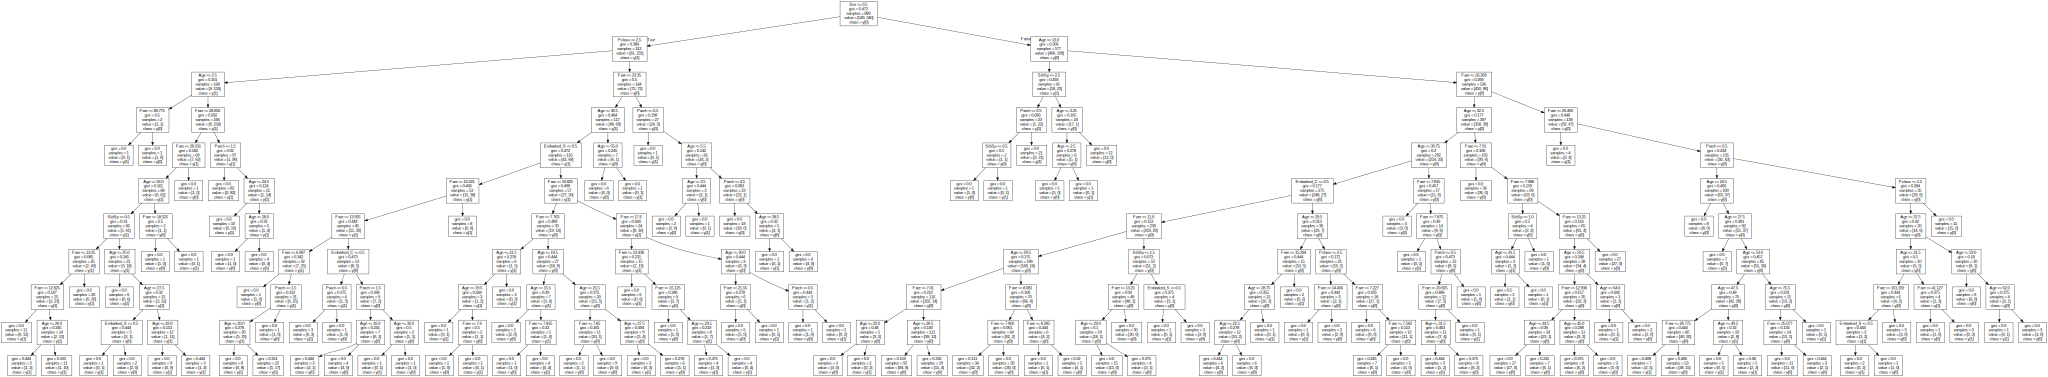

In [ ]:
# con export_graphviz
dot_data = tree.export_graphviz(
    arbol_titanic, out_file=None, feature_names=list(X.columns), class_names=True
)
graph = graphviz.Source(dot_data)
graph

## Prediccion

In [ ]:
# Predicción
prediccion = arbol_titanic.predict(X)

In [ ]:
# Precisión de la predicción
accuracy_score(y, prediccion)

0.9347581552305961

In [ ]:
# probamos con otros parámetros
arbol_titanic2 = tree.DecisionTreeClassifier(
    max_depth=15
  , min_samples_split=5, min_samples_leaf=3
)

# Entrena el árbol con los datos del Titanic
arbol_titanic2.fit(X=X, y=y)

# Predicción
prediccion2 = arbol_titanic2.predict(X)

# Precisión de la predicción
acc2 = accuracy_score(y, prediccion2)
print(acc2)

# QUESTION
# Que ha sucedido??

0.8987626546681665


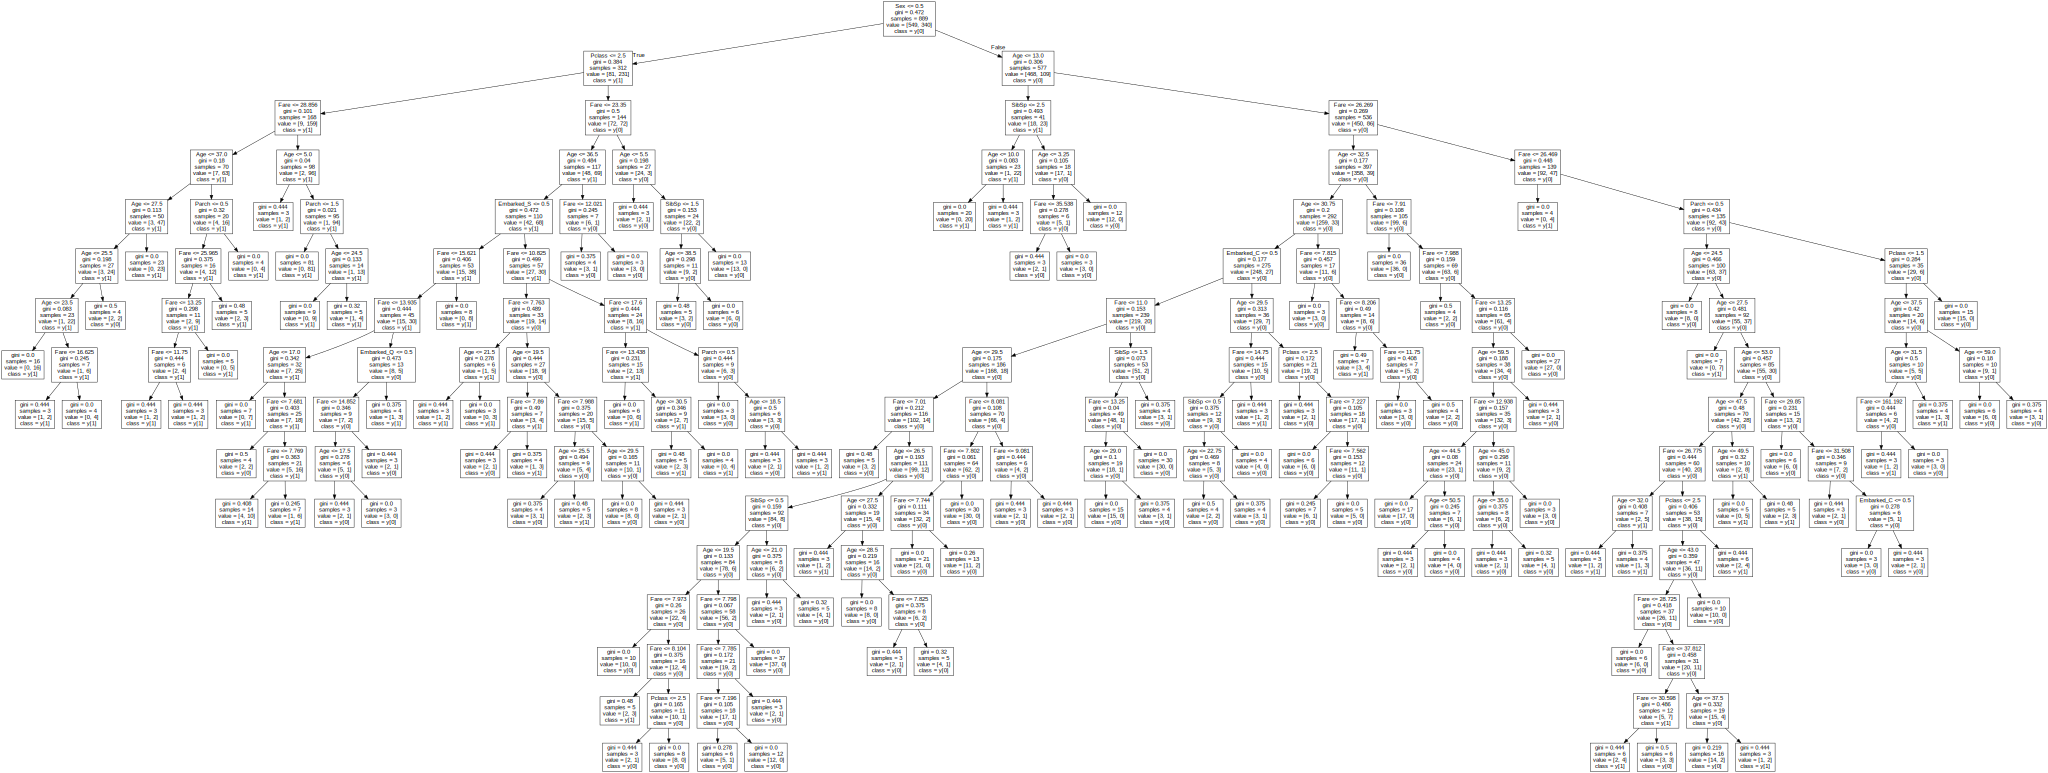

In [ ]:
# con export_graphviz
dot_data2 = tree.export_graphviz(
    arbol_titanic2, out_file=None, feature_names=list(X.columns), class_names=True
)
graph = graphviz.Source(dot_data2)
graph